In [7]:
import __future__ 
from pylab import *
from scipy.io import loadmat
from toolbox_02450 import clusterplot
from sklearn.cluster import k_means
from toolbox_02450 import clusterval
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
%matplotlib inline

For all data (except exercise 1.5)

In [18]:
# Load Matlab data file and extract variables of interest
mat_data = loadmat('Data/synth1.mat')
X = np.matrix(mat_data['X'])
y = np.matrix(mat_data['y'])
attributeNames = [name[0] for name in mat_data['attributeNames'].squeeze()]
classNames = [name[0][0] for name in mat_data['classNames']]
N, M = X.shape
C = len(classNames)

Help on k-means method

In [14]:
help(k_means)

Help on function k_means in module sklearn.cluster.k_means_:

k_means(X, n_clusters, init='k-means++', precompute_distances='auto', n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=1, algorithm='auto', return_n_iter=False)
    K-means clustering algorithm.
    
    Read more in the :ref:`User Guide <k_means>`.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        The observations to cluster.
    
    n_clusters : int
        The number of clusters to form as well as the number of
        centroids to generate.
    
    max_iter : int, optional, default 300
        Maximum number of iterations of the k-means algorithm to run.
    
    n_init : int, optional, default: 10
        Number of time the k-means algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of inertia.
    
    init : {'k-means++', 

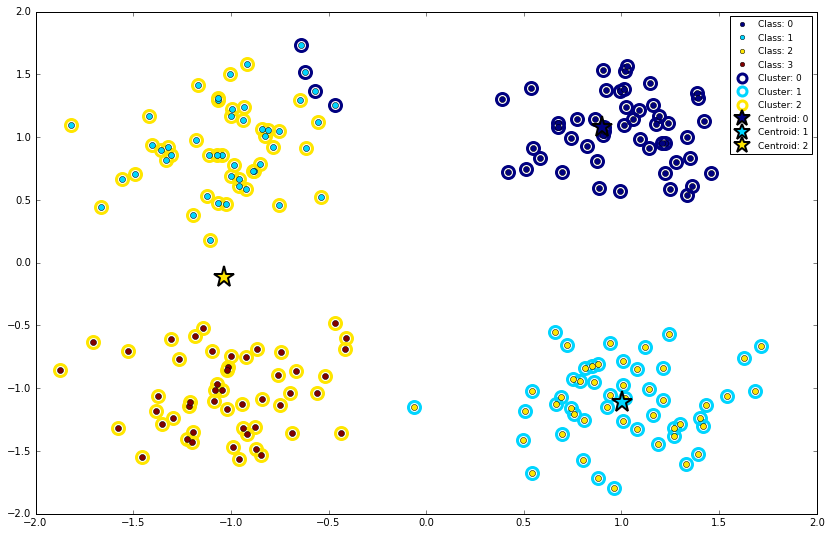

In [21]:
# Number of clusters:
K = 3

# K-means clustering:
centroids, cls, inertia = k_means(X,K)
    
# Plot results:
figure(figsize=(14,9))
clusterplot(X, cls, centroids, y)
show()

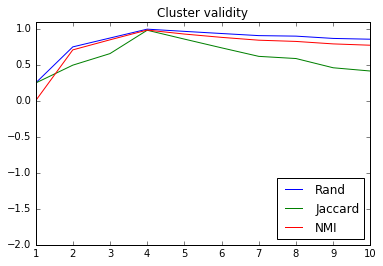

In [10]:
# exercise 10.1.3
# Calculating the optimal number of clusters!
# Maximum number of clusters:
K = 10

# Allocate variables:
Rand = np.zeros((K,1))
Jaccard = np.zeros((K,1))
NMI = np.zeros((K,1))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    centroids, cls, inertia = k_means(X,k+1)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

figure(1)
title('Cluster validity')
hold(True)
plot(np.arange(K)+1, Rand)
plot(np.arange(K)+1, Jaccard)
plot(np.arange(K)+1, NMI)
ylim(-2,1.1)
legend(['Rand', 'Jaccard', 'NMI'], loc=4)
show()

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 167302.769216
start iteration
done sorting
end inner loop
Iteration 1, inertia 162024.285708
start iteration
done sorting
end inner loop
Iteration 2, inertia 160056.742703
start iteration
done sorting
end inner loop
Iteration 3, inertia 159360.948677
start iteration
done sorting
end inner loop
Iteration 4, inertia 159107.501283
start iteration
done sorting
end inner loop
Iteration 5, inertia 158888.415782
start iteration
done sorting
end inner loop
Iteration 6, inertia 158612.448784
start iteration
done sorting
end inner loop
Iteration 7, inertia 158407.914985
start iteration
done sorting
end inner loop
Iteration 8, inertia 158213.36365
start iteration
done sorting
end inner loop
Iteration 9, inertia 158074.074744
start iteration
done sorting
end inner loop
Iteration 10, inertia 157867.906906
start iteration
done sorting
end inner loop
Iteration 11, inertia 157719.988837
start iteration
done sortin

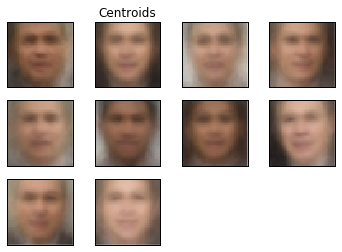

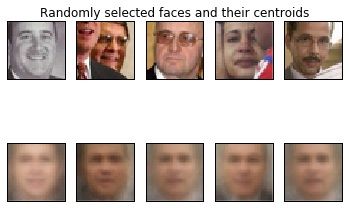

In [12]:
# exercise 10_1_5

# Load Matlab data file and extract variables of interest
mat_data2 = loadmat('Data/wildfaces.mat')
X = np.matrix(mat_data2['X'])
N, M = X.shape
# Image resolution and number of colors
x = 40 
y = 40
c = 3

# Number of clusters:
K = 10

# Number of repetitions with different initial centroid seeds
S = 1

# Run k-means clustering:
centroids, cls, inertia = k_means(X, K, verbose=True, max_iter=100, n_init=S)

# Plot results:

# Plot centroids
figure(1)
n1 = np.ceil(np.sqrt(K/2)); n2 = np.ceil(np.float(K)/n1);
for k in range(K):
    subplot(n1,n2,k+1)
    imshow(np.reshape(centroids[k,:],(c,x,y)).T,interpolation='None',cmap=cm.binary)
    xticks([]); yticks([])
    if k==np.floor((n2-1)/2): title('Centroids')

# Plot few randomly selected faces and their nearest centroids    
L = 5       # number of images to plot
j = np.random.randint(0, N, L)
figure(2)
for l in range(L):
    subplot(2,L,l+1)
    imshow(np.resize(X[j[l],:],(c,x,y)).T,interpolation='None',cmap=cm.binary)
    xticks([]); yticks([])
    if l==np.floor((L-1)/2): title('Randomly selected faces and their centroids')
    subplot(2,L,L+l+1)
    imshow(np.resize(centroids[cls[j[l]],:],(c,x,y)).T,interpolation='None',cmap=cm.binary)
    xticks([]); yticks([])

show()

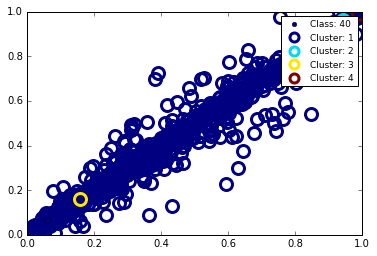

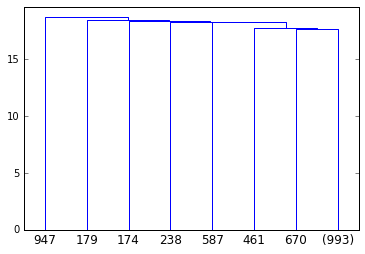

In [13]:
# exercise 10.2.1

# Perform hierarchical/agglomerative clustering on data matrix
Method = 'single'
Metric = 'euclidean'

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion='maxclust', t=Maxclust)
figure(1)
clusterplot(X, cls.reshape(cls.shape[0],1), y=y)

# Display dendrogram
max_display_levels=6
figure(2)
dendrogram(Z, truncate_mode='level', p=max_display_levels)

show()
